In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline

In [4]:
#Read in all survey data from 2015-2017
with zipfile.ZipFile("NSDUH-2017-DS0001-bndl-data-tsv.zip") as z:
    data_2017 = pd.read_csv(z.open("NSDUH_2017_Tab.tsv"), sep="\t", low_memory= False)
with zipfile.ZipFile("NSDUH-2016-DS0001-bndl-data-tsv.zip") as z:
    data_2016 = pd.read_csv(z.open("NSDUH_2016_Tab.tsv"), sep="\t", low_memory= False)
with zipfile.ZipFile("NSDUH-2015-DS0001-bndl-data-tsv.zip") as z:
    data_2015 = pd.read_csv(z.open("NSDUH_2015_Tab.tsv"), sep="\t", low_memory= False)

In [5]:
#verify shapes
print(data_2017.shape)
print(data_2016.shape)
print(data_2015.shape) #cols that werent collected in 2016 and 2017 need to be removed

(56276, 2668)
(56897, 2668)
(57146, 2679)


In [6]:
#Based on PUFVariableCrossWalk2017 there are inconsistent column headers - change to match 2017
data_2015.rename(columns={"COLLENRST": 'COLLENRLST', 'COLLENRFT': 'COLLENRLFT'}, inplace=True)

In [7]:
#columns in 2016 that arent in 2017
data_2016.columns.difference(data_2017.columns)

Index(['PNROTNMYR3', 'SEDOTNMYR3', 'STMOTNMYR3', 'TRQOTNMYR3'], dtype='object')

In [8]:
#columns in 2017 that arent in 2016
data_2017.columns.difference(data_2016.columns)

Index(['EDUSCKCOM', 'EDUSCKEST', 'EDUSKPCOM', 'EDUSKPEST'], dtype='object')

In [10]:
#Begin removing inconsistent columns
data_2016.drop(['PNROTNMYR3', 'SEDOTNMYR3', 'STMOTNMYR3', 'TRQOTNMYR3'], axis = 1, inplace= True)
data_2017.drop(['EDUSCKCOM', 'EDUSCKEST', 'EDUSKPCOM', 'EDUSKPEST'], axis = 1, inplace=True)

In [15]:
#merge 2016 and 2017 data
data = pd.concat([data_2017, data_2016], ignore_index= True)

In [25]:
#columns in 2016/2017 that arent in 2015
missing_cols_2015 = data.columns.difference(data_2015.columns)
#columns in 2015 that arent in 2016/2017
extra_cols_2015 = data_2015.columns.difference(data.columns)

In [28]:
#Run only if we want to include 2015 data
data.drop(list(missing_cols_2015), axis = 1, inplace = True)
data_2015.drop(list(extra_cols_2015), axis = 1, inplace = True)

In [31]:
print(data.shape)
print(data_2015.shape)

(113173, 2631)
(57146, 2631)


In [32]:
#merge 2015 and 2016/2017 data
data = pd.concat([data, data_2015], ignore_index= True)
print(data.shape)

(170319, 2631)


In [34]:
dep_var_counts = data["PNRNMINIT"].astype("str").value_counts()

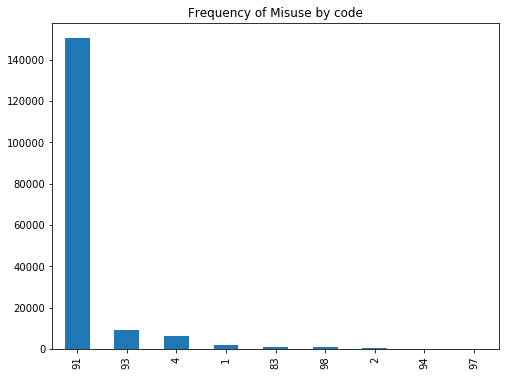

In [35]:
dep_var_counts.plot(kind='bar', figsize = (8,6), title= "Frequency of Misuse by code")

In [36]:
for i,j in list(dep_var_counts.to_dict().items()):
    print("{} makes up {}% of the total".format(i,100*j/sum(list(dep_var_counts.to_dict().values()))))

91 makes up 88.24558622349826% of the total
93 makes up 5.49263440954914% of the total
4 makes up 3.639640909117597% of the total
1 makes up 1.0621246014830994% of the total
83 makes up 0.6934047287736541% of the total
98 makes up 0.4702939777711236% of the total
2 makes up 0.36226140360147724% of the total
94 makes up 0.018201140213364334% of the total
97 makes up 0.015852605992285065% of the total


In [37]:
unique_vals_per_col = data.nunique()

In [38]:
#x = Unique vals in a column   y = Number of cols that share that unique value
freq_counts = pd.Series(list(unique_vals_per_col)).value_counts().to_dict()
freq_counts = sorted(freq_counts.items())
freq_counts

[(2, 728),
 (3, 91),
 (4, 121),
 (5, 106),
 (6, 248),
 (7, 287),
 (8, 202),
 (9, 243),
 (10, 138),
 (11, 68),
 (12, 52),
 (13, 12),
 (14, 12),
 (15, 6),
 (16, 13),
 (17, 5),
 (18, 3),
 (19, 32),
 (20, 5),
 (21, 7),
 (22, 4),
 (23, 4),
 (24, 3),
 (25, 7),
 (26, 1),
 (27, 5),
 (28, 2),
 (29, 5),
 (30, 5),
 (31, 6),
 (32, 8),
 (33, 11),
 (34, 3),
 (35, 10),
 (36, 17),
 (37, 2),
 (38, 6),
 (39, 2),
 (41, 1),
 (43, 1),
 (44, 2),
 (46, 2),
 (47, 2),
 (48, 3),
 (49, 3),
 (50, 2),
 (51, 1),
 (52, 2),
 (53, 1),
 (54, 2),
 (55, 3),
 (56, 3),
 (57, 4),
 (58, 4),
 (59, 6),
 (60, 5),
 (61, 4),
 (62, 5),
 (63, 3),
 (64, 1),
 (65, 6),
 (66, 1),
 (67, 4),
 (68, 2),
 (71, 5),
 (72, 3),
 (74, 2),
 (75, 3),
 (76, 1),
 (77, 3),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (83, 1),
 (86, 1),
 (87, 2),
 (88, 3),
 (89, 3),
 (90, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 1),
 (96, 1),
 (97, 4),
 (98, 1),
 (102, 1),
 (103, 1),
 (106, 2),
 (109, 1),
 (111, 2),
 (113, 1),
 (114, 1),
 (115, 1),
 (119, 1),
 (120, 1),
 (

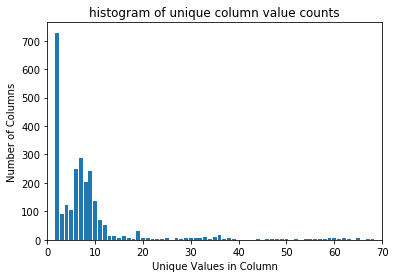

In [40]:
x,y = zip(*freq_counts)
plt.bar(list(x), list(y))
plt.xlim([0,70])
plt.title("histogram of unique column value counts")
plt.xlabel("Unique Values in Column")
plt.ylabel("Number of Columns")